# Inclass Exercises

## 1 - Plot spectogram of a given data

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
from scipy import signal

fs = 1000
window = 5
fc = 500
filter_order = 10
data_file = 'rat4-preto-WD-20150316-60min-239trials-92PC-LFP1.mat'
data = loadmat(data_file)
channel_1 = data['pLFP'][:,0]

# 10s
ten_sec = 10*fs
windowed_signal = channel_1[ten_sec:ten_sec+(window*fs)]

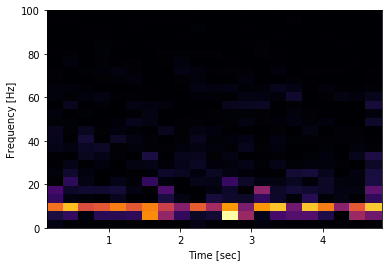

In [2]:
f, t, Sxx = signal.spectrogram(windowed_signal, fs)
plt.pcolormesh(t, f, Sxx, cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 100])
plt.show()

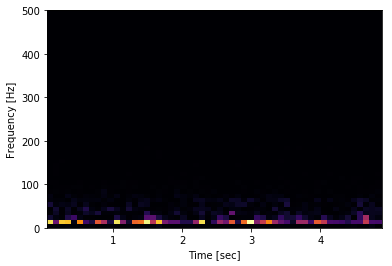

In [3]:
f, t, Sxx = signal.spectrogram(windowed_signal, fs, nperseg=100)
plt.pcolormesh(t, f, Sxx, cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

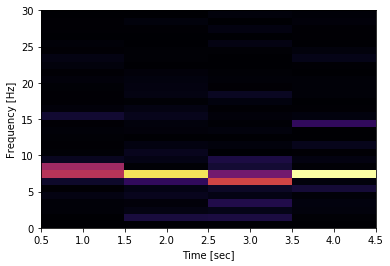

In [4]:
f, t, Sxx = signal.spectrogram(windowed_signal, fs, nperseg=1000, noverlap=0)
plt.pcolormesh(t, f, Sxx, cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 30])
plt.show()

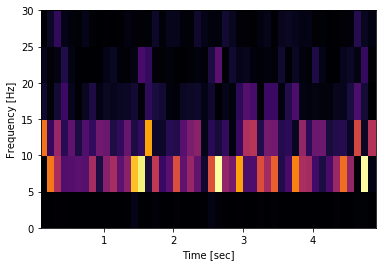

In [5]:
f, t, Sxx = signal.spectrogram(windowed_signal, fs, nfft=200, nperseg=200, noverlap=100)
plt.pcolormesh(t, f, Sxx, cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 30])
plt.show()

## 2 - Plot Spectrogram of the signal with event

There are 254 events on 'event.mat'  

For each even get -4 to +4 window where:
- -4 to -2: 
- -2 to -1:
- -0.5 to +0.5:
- 0.5 to 1:
- 1 to 4:

Use Z-score protocol

In [90]:
time_window = 4
event_data = loadmat('event.mat', squeeze_me=True)
events = event_data.get('event')
event_indexes = np.array([int(event*fs) for event in events])
event_indexes = event_indexes[:-1]
event_windowed_data = np.array([channel_1[e_idx-time_window*fs:e_idx+time_window*fs] for e_idx in event_indexes])

In [91]:
normalized = zscore(event_windowed_data)

In [92]:
filtered_mean = np.mean(normalized, axis=0)

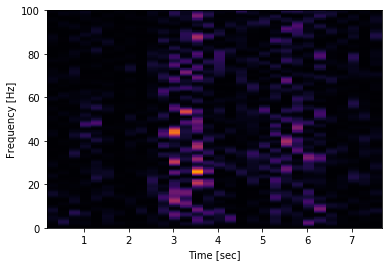

In [96]:
f, t, Sxx = signal.spectrogram(filtered_mean, fs, nfft=2000, nperseg=350, noverlap=100)
plt.pcolormesh(t, f, Sxx, cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 100])
plt.show()